В цьому домашньому завданні ми знову працюємо з даними з нашого змагання ["Bank Customer Churn Prediction (DLU Course)"](https://www.kaggle.com/t/7c080c5d8ec64364a93cf4e8f880b6a0).

Тут ми побудуємо рішення задачі класифікації з використанням Decision Trees і зробимо новий submission на змагання на Kaggle.

В цьому ДЗ ми працюємо без pipelines, бо так буде зручніше для візуалізації і інтерпретації моделі дерева прийняття рішень. Так буває і в робочих проєктах: іноді зручніше використати sklearn.Pipelines, іноді зручніше без них. На етапі пошуку рішення (research) зручніше без пайплайнів, а з пайплайнами - коли ви відлагодили процес обробки даних і хочете поекспериментувати з різними моделями і гіперпараметрами.

**Завдання 1.**

У попередньому домашньому завданні, `HW 2.7 Логістична регресія з scikit learn.ipynb`, ми писали обробку даних для змагання. Ваше завдання зараз - за прикладом, наведеним в лекції `Майстер-клас з перенесення коду з jupyter notebook у Python модуль`, перенести попередню обробку сирих даних з вашого розв'язку ДЗ 2.7 у файл `process_bank_churn.py` в функцію `preprocess_data(...)`.

Функція `preprocess_data()` має приймати `raw_df` і вертати `X_train`, `train_targets`, `X_val`, `val_targets`, `input_cols`(перелік назв колонок, які Ви використовуєте в X), `scaler`, `encoder`, які ми потім будемо використовувати для тренування дерева прийняття рішень.


### Кроки попередньої обробки:

1. Обираємо колонки для роботи. В цьому завдання для чистоти експериментів рекомендую прибрати колонку `Surname`, так буде простіше інтрепретувати модель. Ви можете її додати вже за самостійних подальших експериментів.
2. Розбиття сирих даних на тренувальні і валідаційні.
3. Обробка категоріальних даних (one hot encoding).
4. Масштабування числових даних (було частиною попередньої обробки в попередніх завданнях). Для дерев нам не обовʼязково масштабувати ознаки, тож в коді можна зробити цю частину опціональною, додавши в `preprocess_data` параметр `scaler_numeric`, який приймає значення `True` або `False`. Це дозволить використовувати код попередньоъ обробки з різними моделями.


### Інструкції:
1. Перенесіть попередню обробку даних у файл `process_bank_churn.py`.
2. Забезпечте модулярну структуру функцій: кожна функція повинна виконувати лише одну дію, наприклад, масштабувати ознаки.
3. Додайте докстрінги до кожної функції.
4. Використовуйте typing для аргументів та значень, що повертаються функціями.
5. Передбачте обробку нових даних. Додайте спеціальну функцію `preprocess_new_data(...)`, яка приймає на вхід нові дані в вигляді pandas DataFrame та використовує вже навчені скейлер та енкодер (передані теж як аргументи фукнціх) для їх обробки. Ця функція буде корисною для обробки нових даних перед передбаченням або оцінкою моделі, коли оброблятимемо `test.csv`.

Можна і рекомендовано виконувати це завдання з ChatGPT (бажано, новіше, ніж 3.5) як було наведено у відео-прикладі, тільки **ваше додаткове завдання - розібратись з кодом, який вам згенерувала мовна модель :)**.

## В результаті цього завдання

1. Завантажте ваш готовий `process_bank_churn.py` файл на GitHub у свій репозиторій.
2. Додайте посилання на файл в репозиторії тут у ноутбуці.
3. Нижче зробіть імпорт функції `preprocess_data` з вашого модуля `process_bank_churn.py`.



link to GitHub: https://github.com/y-zakharova/machine-learning-for-people-course/blob/main/process_bank_churn.py

Для виконання завдання використовувала і GPT, i Claude, проте обрала рішення від другої моделі, оскільки більше сподобалась розбивка на функції і детальний опис і опрацювання еррорів.

In [43]:
from process_bank_churn import preprocess_data, preprocess_new_data
from sklearn.tree import DecisionTreeClassifier, plot_tree, export_text
from sklearn.metrics import roc_auc_score

import pandas as pd
import matplotlib.pyplot as plt

In [2]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


**Завдання 2.**
1. Натренуйте дерево прийняття рішень з зафіксованим `random_state` і з рештою аргументів за замовченням.
2. Виведіть area under ROC для моделі на тренувальних і тестувальних даних. Нам потрібна ця метрика, бо вона основна в змаганні. Модель ок, чи є пере- або недотренування?
3. Виведіть глибину дерева.
4. Побудуйте дерево до глибини 2 включно. Напишіть, які ознаки бачите, що є найвпливовішими тут?
5. Створіть датафрейм `importance_df` з feature importances, де в першому стовпчику `feature` - назва ознаки з нашого Х, а в другому `importance` - значення, наскільки ця ознака є важливою в побудованій моделі. Виведіть топ 10 найвпливовіших ознак разом з їх скором важливості (можна або у вигляді таблиці, або в вигляді barplot).

In [3]:
raw_df = pd.read_csv('drive/MyDrive/Machine Learning Course/datasources/bank-customer-churn-prediction-dlu/train.csv')
raw_df.head(1)

,id,CustomerId,Surname,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,0,15779985.0,Nwankwo,678.0,France,Male,29.0,4.0,0.0,3.0,1.0,0.0,180626.36,0.0


In [4]:
data = preprocess_data(raw_df)

X_train = data['X_train']
train_targets = data['train_targets']
X_val = data['X_val']
val_targets = data['val_targets']
encoder = data['encoder']
scaler = data['scaler']

In [5]:
model = DecisionTreeClassifier(random_state=42).fit(X_train, train_targets)

In [6]:
train_preds = model.predict(X_train)
val_preds = model.predict(X_val)

auc_train = roc_auc_score(train_targets, train_preds)
auc_val = roc_auc_score(val_targets, val_preds)

print('ROC AUC train:', auc_train)
print('ROC AUC val:', auc_val)

ROC AUC train: 1.0
ROC AUC val: 0.7740688661773785


Модель є перенавченою, оскільки AUC на тренувальних даних = 1, а на валідаційних = 0.77.

In [7]:
model.tree_.max_depth

26

In [8]:
model_two = DecisionTreeClassifier(random_state=42, max_depth=2).fit(X_train, train_targets)

In [9]:
train_preds_two = model_two.predict(X_train)
val_preds_two = model_two.predict(X_val)

auc_train_two = roc_auc_score(train_targets, train_preds_two)
auc_val_two = roc_auc_score(val_targets, val_preds_two)

print('ROC AUC train:', auc_train_two)
print('ROC AUC val:', auc_val_two)

ROC AUC train: 0.719689771949659
ROC AUC val: 0.7094759585705468


Бачимо, що для моделі із максимальною глибиною = 2 вже відсутнє перенавчання, але при цьому точність на валідаційних даних менша.

In [10]:
importance_df = pd.DataFrame({
    'feature': model_two.feature_names_in_,
    'importance': model_two.feature_importances_
}).sort_values(by='importance', ascending=False)
importance_df.head(10)

,feature,importance
1,Age,0.714962
4,NumOfProducts,0.285038
2,Tenure,0.000000
0,CreditScore,0.000000
3,Balance,0.000000
5,HasCrCard,0.000000
6,IsActiveMember,0.000000
7,EstimatedSalary,0.000000
8,France,0.000000
9,Germany,0.000000


Для дерева глибиною 2 лише дві ознаки є важливими (і коєфіцієнти біля них не нульові): Age та NumOfProducts – це очікувано з глибини дерева. Тому можна переконатись, побудувавши перелік правил, яким керувалась модель:

In [11]:
print(export_text(model_two, feature_names=list(X_train.columns)))

|--- Age <= 0.46
|   |--- NumOfProducts <= 0.17
|   |   |--- class: 0.0
|   |--- NumOfProducts >  0.17
|   |   |--- class: 0.0
|--- Age >  0.46
|   |--- NumOfProducts <= 0.17
|   |   |--- class: 1.0
|   |--- NumOfProducts >  0.17
|   |   |--- class: 0.0



**Завдання 3**. Спробуйте знайти такі параметри моделі `DecisionTree` аби модель генералізувала ліпше (був вищий показник AUROC на валідаційній вибірці). Проекспериментуйте з різними значеннями параметрів `max_leaf_nodes`, `max_depth` та лишіть ті, які дають найкращий результат, разом з відповідними AUROC на тренувальній і валідаційній вибірках.

В цьому завданні спробуйте просто знайти параметри методом "тика" :)

In [12]:
def max_depth_best(md, max_leaf_nodes=None):
  model = DecisionTreeClassifier(max_depth=md, max_leaf_nodes=max_leaf_nodes, random_state=42).fit(X_train, train_targets)
  train_preds = model.predict(X_train)
  val_preds = model.predict(X_val)
  train_auc = roc_auc_score(train_targets, train_preds)
  val_auc = roc_auc_score(val_targets, val_preds)
  return {
      'Max Depth': md,
      'Max Leaf Nodes': model.max_leaf_nodes,
      'Training AUC': train_auc,
      'Validation AUC': val_auc
      }

In [13]:
max_depth_best(5)

{'Max Depth': 5,
 'Max Leaf Nodes': None,
 'Training AUC': np.float64(0.7865311382260536),
 'Validation AUC': np.float64(0.7736195898209752)}

Бачимо, що для 5 точність вже вища, ніж для 2, і відсутність переначання. Спробуємо збільшити параметр:

In [14]:
max_depth_best(12)

{'Max Depth': 12,
 'Max Leaf Nodes': None,
 'Training AUC': np.float64(0.9186208550615331),
 'Validation AUC': np.float64(0.7850332670279168)}

Для 12 вже видно перенавчання, оскільки різниця в AUC між тренувальним і валідаційним датасетом 0.13.

In [15]:
max_depth_best(8)

{'Max Depth': 8,
 'Max Leaf Nodes': None,
 'Training AUC': np.float64(0.8489349647541737),
 'Validation AUC': np.float64(0.8072467247410661)}

Доволі хороша точність для глибини 8, наразі це найкращий результат. Тепер можемо зафіксувати цю глибину і потестити кількість нод.

In [16]:
max_depth_best(8, 20)

{'Max Depth': 8,
 'Max Leaf Nodes': 20,
 'Training AUC': np.float64(0.8124967545871501),
 'Validation AUC': np.float64(0.8071404074353523)}

In [17]:
max_depth_best(8, 70)

{'Max Depth': 8,
 'Max Leaf Nodes': 70,
 'Training AUC': np.float64(0.8436396077639016),
 'Validation AUC': np.float64(0.8127409287331092)}

**Завдання 4**. В циклі пройдіться по значенням max_depth від 1 до 20 включно, на кожній ітерації натренуйте DecisionTree модель і виміряйте AUROC на трейн і валідаційних даних.

В кінці виведіть на графік залеєність між AUROC на трейн і валідаційних даних і номером ітерації.

In [18]:
max_depth_df = pd.DataFrame([max_depth_best(md) for md in range(1, 21)])
max_depth_df

,Max Depth,Max Leaf Nodes,Training AUC,Validation AUC
0,1,None,0.744727,0.734865
1,2,None,0.719690,0.709476
2,3,None,0.759607,0.744914
3,4,None,0.805899,0.795301
4,5,None,0.786531,0.773620
5,6,None,0.825155,0.804002
6,7,None,0.824103,0.799503
7,8,None,0.848935,0.807247
8,9,None,0.858482,0.795754
9,10,None,0.874960,0.795092


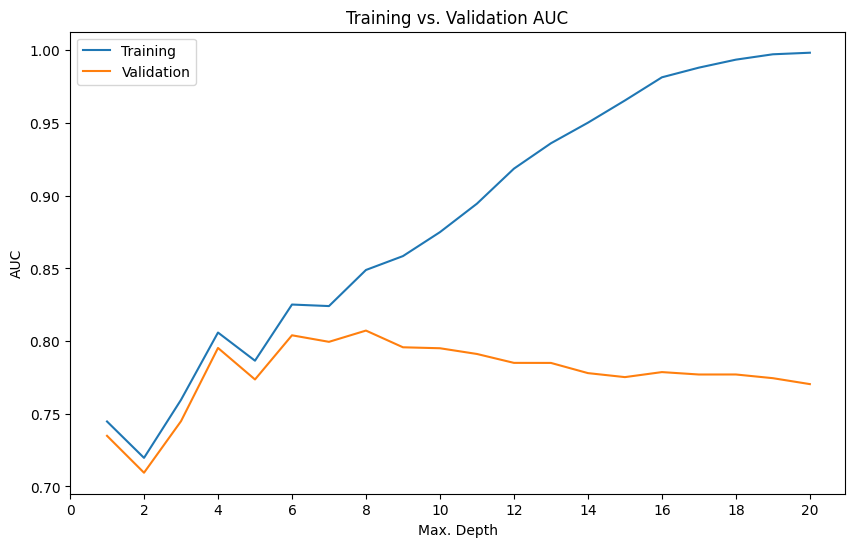

In [19]:
plt.figure(figsize=(10, 6))
plt.plot(max_depth_df['Max Depth'], max_depth_df['Training AUC'])
plt.plot(max_depth_df['Max Depth'], max_depth_df['Validation AUC'])
plt.title('Training vs. Validation AUC')
plt.xticks(range(0,21, 2))
plt.xlabel('Max. Depth')
plt.ylabel('AUC')
plt.legend(['Training', 'Validation']);

Я вважаю, що найкращою виявилася модель з глибиною дерева = 7, оскільки значення AUC для тренувальної і валідаційної вибірки були доволі близько одна до одною, а також не було перенавчання (з графіка видно, що після 8 точність на тренувальних почала рости, а на валідаційних – падати).

**Завдання 5**.
1. Натренуйте модель `DecisionTree` з найкращим значенням `max_depth`, яке ви знайшли на попередній ітерації.
2. Завантажте тестові дані змагання з `test.csv`.
3. Зробіть попередню обробку даних з функцією `preprocess_new_data` з вашого модуля `process_bank_churn.py`.
4. Зробіть передбачення використовуючи цю модель на тестових даних змагання.
5. Сформуйте `submission.csv`.
6. Зробіть новий Submission на Kaggle і додайте тут скріншот Вашого скору на паблік лідерборді :)


In [38]:
model_best = DecisionTreeClassifier(max_depth=7, random_state=42)
model_best.fit(X_train, train_targets)

DecisionTreeClassifier(max_depth=7, random_state=42)

In [39]:
max_depth_best(7)

{'Max Depth': 7,
 'Max Leaf Nodes': None,
 'Training AUC': np.float64(0.8241033791881249),
 'Validation AUC': np.float64(0.7995027093765005)}

In [40]:
test_raw_df = pd.read_csv('drive/MyDrive/Machine Learning Course/datasources/bank-customer-churn-prediction-dlu/test.csv')
X_test = preprocess_new_data(test_raw_df, scaler, encoder)

In [41]:
test_raw_df['Exited'] = model_best.predict(X_test)

In [42]:
submission_df = pd.read_csv('drive/MyDrive/Machine Learning Course/datasources/bank-customer-churn-prediction-dlu/sample_submission.csv')
submission_df = pd.merge(submission_df['id'], test_raw_df[['id', 'Exited']], on='id', how='left')
submission_df.to_csv('submission_tree.csv', index=False)

Оскільки у мене late submission, то не бачу себе на паблік борді, тому прикріпила просто скрін підтвердження того, то сабмітила файли.

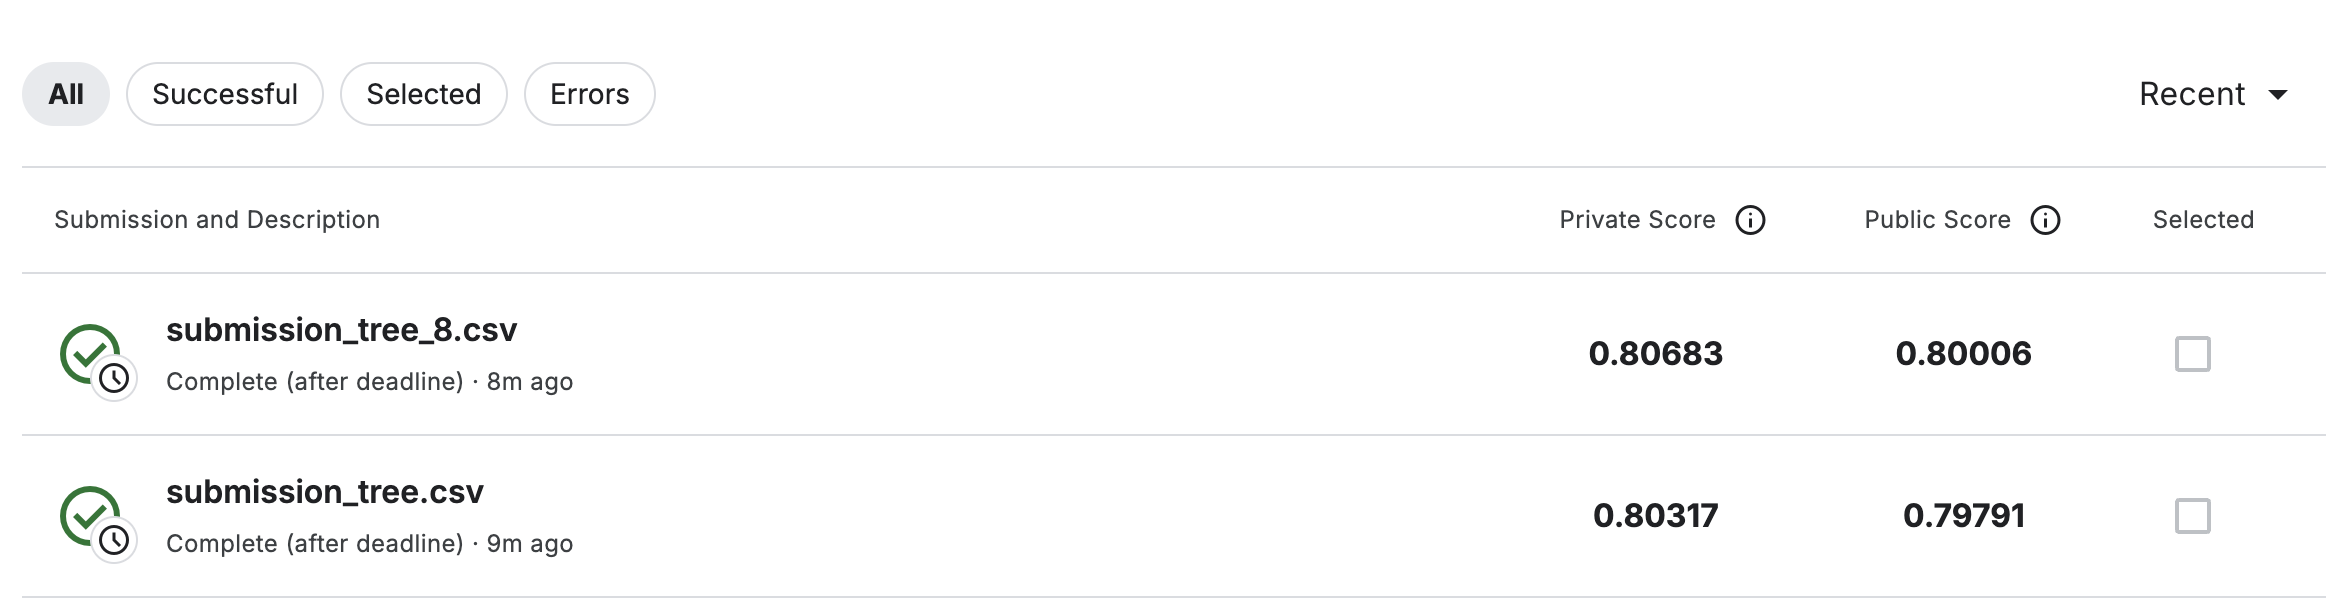